In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as sts
import scipy.optimize as opt
from math import sqrt

In [2]:
x = np.linspace(-10, 10, 500)
y = 0.5 * x + 1 + sts.norm(0, sqrt(0.2)).rvs(500)

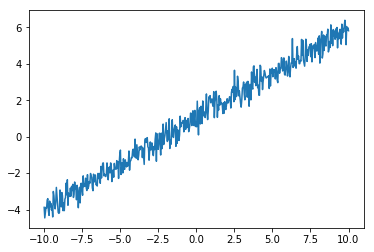

In [3]:
plt.plot(x, y)
plt.show()

In [4]:
def MSE((k, b)):
    return ((k * x + b - y) ** 2.).mean()

In [5]:
w = opt.minimize(MSE, x0=(0., 0.)).x

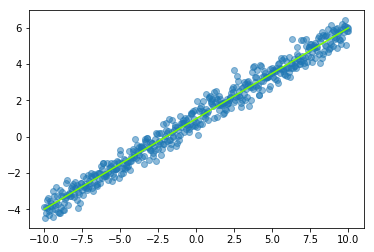

In [6]:
plt.scatter(x, y, alpha=0.5)
plt.plot(x, w[0] * x + w[1], color='lawngreen')
plt.show()

In [7]:
x = np.append(x, x[::7])
y = np.append(y, -1. + sts.norm(0, sqrt(0.2)).rvs(72))

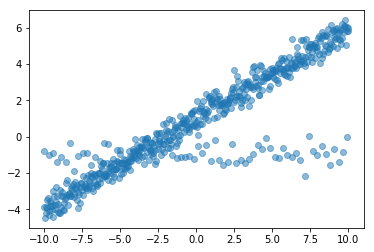

In [8]:
plt.scatter(x, y, alpha=0.5)
plt.show()

In [9]:
w1 = opt.minimize(MSE, x0=(0., 0.)).x

In [10]:
def MAE((k, b)):
    return (np.abs(k * x + b - y)).mean()

In [11]:
w2 = opt.minimize(MAE, x0=(0., 0.)).x

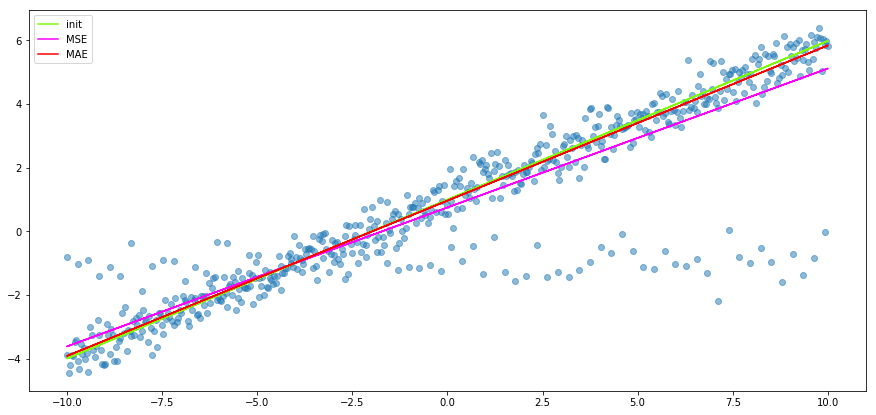

In [12]:
plt.figure(figsize=(15,7))
plt.scatter(x, y, alpha=0.5)
plt.plot(x, w[0] * x + w[1], color='lawngreen', label='init')
plt.plot(x, w1[0] * x + w1[1], color='magenta', label='MSE')
plt.plot(x, w2[0] * x + w2[1], color='red', label='MAE')
plt.legend(loc='best')
plt.show()

# Вывод

Из последнего графика очевидно, что MSE-оценка карает за выбросы сильнее, чем MAE.